## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_151963_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (59165, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts   er   pac        lng  \
0      GSABZT015K000A240218125  2024-07-12 15:45:00  NaN  4.05  119.60465   
1      GSABZT015K000A240218125  2024-07-12 15:50:00  NaN  6.64  119.60465   
2      GSABZT015K000A240218125  2024-07-12 15:55:00  NaN  4.45  119.60465   
3      GSABZT015K000A240218125  2024-07-12 16:00:00  NaN  5.96  119.60465   
4      GSABZT015K000A240218125  2024-07-12 16:05:00  NaN  6.37  119.60465   
...                        ...                  ...  ...   ...        ...   
59160  GSABZT015K000A240218125  2025-05-10 19:05:00  0.0  0.01  119.60465   
59161  GSABZT015K000A240218125  2025-05-10 19:10:00  0.0  0.01  119.60465   
59162  GSABZT015K000A240218125  2025-05-10 19:15:00  0.0  0.01  119.60465   
59163  GSABZT015K000A240218125  2025-05-10 19:20:00  0.0  0.01  119.60465   
59164  GSABZT015K000A240218125  2025-05-10 19:25:00  0.0  0.01  119.60465   

             lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      33.598873     斜屋顶双坡   15.0         29.6840               61.7475  ...   
1      33.598873     斜屋顶双坡   15.0             NaN                   NaN  ...   
2      33.598873     斜屋顶双坡   15.0             NaN                   NaN  ...   
3      33.598873     斜屋顶双坡   15.0         29.6582               62.1245  ...   
4      33.598873     斜屋顶双坡   15.0             NaN                   NaN  ...   
...          ...       ...    ...             ...                   ...  ...   
59160  33.598873     斜屋顶双坡   15.0             NaN                   NaN  ...   
59161  33.598873     斜屋顶双坡   15.0             NaN                   NaN  ...   
59162  33.598873     斜屋顶双坡   15.0         15.7263               72.9326  ...   
59163  33.598873     斜屋顶双坡   15.0             NaN                   NaN  ...   
59164  33.598873     斜屋顶双坡   15.0             NaN                   NaN  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                      373.1200           166.2732          3.1002   
1                           NaN                NaN             NaN   
2                           NaN                NaN             NaN   
3                      329.7193           157.9819          3.0671   
4                           NaN                NaN             NaN   
...                         ...                ...             ...   
59160                       NaN                NaN             NaN   
59161                       NaN                NaN             NaN   
59162                    0.4203             1.0361          2.4739   
59163                       NaN                NaN             NaN   
59164                       NaN                NaN             NaN   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0              4.0278           4.2390            138.6788   
1                 NaN              NaN                 NaN   
2                 NaN              NaN                 NaN   
3              4.0301           4.2510            136.5950   
4                 NaN              NaN                 NaN   
...               ...              ...                 ...   
59160             NaN              NaN                 NaN   
59161             NaN              NaN                 NaN   
59162          5.0567           5.8143            281.8197   
59163             NaN              NaN                 NaN   
59164             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                139.9602             140.4751  2024-07-12 15:45:00   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3                138.0765             138.6593  2024-07-12 16:00:00   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
59160                 NaN                  NaN             

In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                       sn                   ts   er  \
0     2024-07-12 15:45:00  GSABZT015K000A240218125  2024-07-12 15:45:00  NaN   
1     2024-07-12 15:50:00  GSABZT015K000A240218125  2024-07-12 15:50:00  NaN   
2     2024-07-12 15:55:00  GSABZT015K000A240218125  2024-07-12 15:55:00  NaN   
3     2024-07-12 16:00:00  GSABZT015K000A240218125  2024-07-12 16:00:00  NaN   
4     2024-07-12 16:05:00  GSABZT015K000A240218125  2024-07-12 16:05:00  NaN   
...                   ...                      ...                  ...  ...   
87016 2025-05-10 19:05:00  GSABZT015K000A240218125  2025-05-10 19:05:00  0.0   
87017 2025-05-10 19:10:00  GSABZT015K000A240218125  2025-05-10 19:10:00  0.0   
87018 2025-05-10 19:15:00  GSABZT015K000A240218125  2025-05-10 19:15:00  0.0   
87019 2025-05-10 19:20:00  GSABZT015K000A240218125  2025-05-10 19:20:00  0.0   
87020 2025-05-10 19:25:00  GSABZT015K000A240218125  2025-05-10 19:25:00  0.0   

        pac        lng        lat roof_type  angle  temperature_2m  ...  \
0      4.05  119.60465  33.598873     斜屋顶双坡   15.0         29.6840  ...   
1      6.64  119.60465  33.598873     斜屋顶双坡   15.0             NaN  ...   
2      4.45  119.60465  33.598873     斜屋顶双坡   15.0             NaN  ...   
3      5.96  119.60465  33.598873     斜屋顶双坡   15.0         29.6582  ...   
4      6.37  119.60465  33.598873     斜屋顶双坡   15.0             NaN  ...   
...     ...        ...        ...       ...    ...             ...  ...   
87016  0.01  119.60465  33.598873     斜屋顶双坡   15.0             NaN  ...   
87017  0.01  119.60465  33.598873     斜屋顶双坡   15.0             NaN  ...   
87018  0.01  119.60465  33.598873     斜屋顶双坡   15.0         15.7263  ...   
87019  0.01  119.60465  33.598873     斜屋顶双坡   15.0             NaN  ...   
87020  0.01  119.60465  33.598873     斜屋顶双坡   15.0             NaN  ...   

       direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0              221.1846                  373.1200           166.2732   
1                   NaN                       NaN                NaN   
2                   NaN                       NaN                NaN   
3              180.2245                  329.7193           157.9819   
4                   NaN                       NaN                NaN   
...                 ...                       ...                ...   
87016               NaN                       NaN                NaN   
87017               NaN                       NaN                NaN   
87018            0.0493                    0.4203             1.0361   
87019               NaN                       NaN                NaN   
87020               NaN                       NaN                NaN   

       wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0              3.1002          4.0278           4.2390            138.6788   
1                 NaN             NaN              NaN                 NaN   
2                 NaN             NaN              NaN                 NaN   
3              3.0671          4.0301           4.2510            136.5950   
4                 NaN             NaN              NaN                 NaN   
...               ...             ...              ...                 ...   
87016             NaN             NaN              NaN                 NaN   
87017             NaN             NaN              NaN                 NaN   
87018          2.4739          5.0567           5.8143            281.8197   
87019             NaN             NaN              NaN                 NaN   
87020             NaN             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  
0                139.9602             140.4751  2024-07-12 15:45:00  
1                     NaN                  NaN                  NaN  
2                     NaN                  NaN                  NaN  
3                138.0765             138.6593  2024-07-12 16:00:00  
4 

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([   49,    50,    51,    52,    53,    54,    55,    56,    57,    58,
        ...
        86836, 86837, 86838, 86839, 86840, 86841, 86842, 86843, 86844, 86845],
       dtype='int64', length=41774),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([   49,    50,    51,    52,    53,    54,    55,    56,    57,    58,
        ...
        86836, 86837, 86838, 86839, 86840, 86841, 86842, 86843, 86844, 86845],
       dtype='int64', length=41774),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
        ...
        86836, 86837, 86838, 86839, 86840, 86841, 86842, 86843, 86844, 86845],
       dtype='int64', length=42413),
 True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([   49,    50,    51,    52,    53,    54,    55,    56,    57,    58,
        ...
        86836, 86837, 86838, 86839, 86840, 86841, 86842, 86843, 86844, 86845],
       dtype='int64', length=41774),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([   49,    50,    51,    52,    53,    54,    55,    56,    57,    58,
        ...
        86836, 86837, 86838, 86839, 86840, 86841, 86842, 86843, 86844, 86845],
       dtype='int64', length=41774),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([    1,     2,     4,     5,     7,     8,    10,    11,    13,    14,
        ...
        87007, 87008, 87010, 87011, 87013, 87014, 87016, 87017, 87019, 87020],
       dtype='int64', length=58014),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                       sn                   ts   er  \
0     2024-07-12 15:45:00  GSABZT015K000A240218125  2024-07-12 15:45:00  0.0   
1     2024-07-12 15:50:00  GSABZT015K000A240218125  2024-07-12 15:50:00  0.0   
2     2024-07-12 15:55:00  GSABZT015K000A240218125  2024-07-12 15:55:00  0.0   
3     2024-07-12 16:00:00  GSABZT015K000A240218125  2024-07-12 16:00:00  0.0   
4     2024-07-12 16:05:00  GSABZT015K000A240218125  2024-07-12 16:05:00  0.0   
...                   ...                      ...                  ...  ...   
87016 2025-05-10 19:05:00  GSABZT015K000A240218125  2025-05-10 19:05:00  0.0   
87017 2025-05-10 19:10:00  GSABZT015K000A240218125  2025-05-10 19:10:00  0.0   
87018 2025-05-10 19:15:00  GSABZT015K000A240218125  2025-05-10 19:15:00  0.0   
87019 2025-05-10 19:20:00  GSABZT015K000A240218125  2025-05-10 19:20:00  0.0   
87020 2025-05-10 19:25:00  GSABZT015K000A240218125  2025-05-10 19:25:00  0.0   

        pac        lng        lat roof_type  angle  temperature_2m  ...  \
0      4.05  119.60465  33.598873     斜屋顶双坡   15.0       29.684000  ...   
1      6.64  119.60465  33.598873     斜屋顶双坡   15.0       29.675400  ...   
2      4.45  119.60465  33.598873     斜屋顶双坡   15.0       29.666800  ...   
3      5.96  119.60465  33.598873     斜屋顶双坡   15.0       29.658200  ...   
4      6.37  119.60465  33.598873     斜屋顶双坡   15.0       29.642833  ...   
...     ...        ...        ...       ...    ...             ...  ...   
87016  0.01  119.60465  33.598873     斜屋顶双坡   15.0       15.890500  ...   
87017  0.01  119.60465  33.598873     斜屋顶双坡   15.0       15.808400  ...   
87018  0.01  119.60465  33.598873     斜屋顶双坡   15.0       15.726300  ...   
87019  0.01  119.60465  33.598873     斜屋顶双坡   15.0       15.726300  ...   
87020  0.01  119.60465  33.598873     斜屋顶双坡   15.0       15.726300  ...   

       direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0            221.184600                373.120000         166.273200   
1            207.531233                358.653100         163.509433   
2            193.877867                344.186200         160.745667   
3            180.224500                329.719300         157.981900   
4            168.722567                317.790000         154.456833   
...                 ...                       ...                ...   
87016          0.115100                  0.980767           2.417500   
87017          0.082200                  0.700533           1.726800   
87018          0.049300                  0.420300           1.036100   
87019          0.049300                  0.420300           1.036100   
87020          0.049300                  0.420300           1.036100   

       wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0            3.100200        4.027800           4.2390          138.678800   
1            3.089167        4.028567           4.2430          137.984200   
2            3.078133        4.029333           4.2470          137.289600   
3            3.067100        4.030100           4.2510          136.595000   
4            3.047967        4.022700           4.2469          135.818033   
...               ...             ...              ...                 ...   
87016        2.507767        5.050900           5.7925          284.990367   
87017        2.490833        5.053800           5.8034          283.405033   
87018        2.473900        5.056700           5.8143          281.819700   
87019        2.473900        5.056700           5.8143          281.819700   
87020        2.473900        5.056700           5.8143          281.819700   

       wind_direction_80m  wind_direction_120m        variable_date  
0              139.960200           140.475100  2024-07-12 15:45:00  
1              139.332300           139.869833                  NaN  
2              138.704400           139.264567                  NaN  
3              138.076500           138.659300  2024-07-12 16:00:00  
4 

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([], dtype='int64'), False)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=87021, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                       sn  \
ts                                                                 
2024-07-12 15:45:00 2024-07-12 15:45:00  GSABZT015K000A240218125   
2024-07-12 15:50:00 2024-07-12 15:50:00  GSABZT015K000A240218125   
2024-07-12 15:55:00 2024-07-12 15:55:00  GSABZT015K000A240218125   
2024-07-12 16:00:00 2024-07-12 16:00:00  GSABZT015K000A240218125   
2024-07-12 16:05:00 2024-07-12 16:05:00  GSABZT015K000A240218125   
...                                 ...                      ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  GSABZT015K000A240218125   
2025-05-10 19:10:00 2025-05-10 19:10:00  GSABZT015K000A240218125   
2025-05-10 19:15:00 2025-05-10 19:15:00  GSABZT015K000A240218125   
2025-05-10 19:20:00 2025-05-10 19:20:00  GSABZT015K000A240218125   
2025-05-10 19:25:00 2025-05-10 19:25:00  GSABZT015K000A240218125   

                                     ts   er   pac        lng        lat  \
ts                                                                         
2024-07-12 15:45:00 2024-07-12 15:45:00  0.0  4.05  119.60465  33.598873   
2024-07-12 15:50:00 2024-07-12 15:50:00  0.0  6.64  119.60465  33.598873   
2024-07-12 15:55:00 2024-07-12 15:55:00  0.0  4.45  119.60465  33.598873   
2024-07-12 16:00:00 2024-07-12 16:00:00  0.0  5.96  119.60465  33.598873   
2024-07-12 16:05:00 2024-07-12 16:05:00  0.0  6.37  119.60465  33.598873   
...                                 ...  ...   ...        ...        ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.01  119.60465  33.598873   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.01  119.60465  33.598873   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.01  119.60465  33.598873   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.01  119.60465  33.598873   
2025-05-10 19:25:00 2025-05-10 19:25:00  0.0  0.01  119.60465  33.598873   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2024-07-12 15:45:00     斜屋顶双坡   15.0       29.684000  ...        221.184600   
2024-07-12 15:50:00     斜屋顶双坡   15.0       29.675400  ...        207.531233   
2024-07-12 15:55:00     斜屋顶双坡   15.0       29.666800  ...        193.877867   
2024-07-12 16:00:00     斜屋顶双坡   15.0       29.658200  ...        180.224500   
2024-07-12 16:05:00     斜屋顶双坡   15.0       29.642833  ...        168.722567   
...                       ...    ...             ...  ...               ...   
2025-05-10 19:05:00     斜屋顶双坡   15.0       15.890500  ...          0.115100   
2025-05-10 19:10:00     斜屋顶双坡   15.0       15.808400  ...          0.082200   
2025-05-10 19:15:00     斜屋顶双坡   15.0       15.726300  ...          0.049300   
2025-05-10 19:20:00     斜屋顶双坡   15.0       15.726300  ...          0.049300   
2025-05-10 19:25:00     斜屋顶双坡   15.0       15.726300  ...          0.049300   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2024-07-12 15:45:00                373.120000         166.273200   
2024-07-12 15:50:00                358.653100         163.509433   
2024-07-12 15:55:00                344.186200         160.745667   
2024-07-12 16:00:00                329.719300         157.981900   
2024-07-12 16:05:00                317.790000         154.456833   
...                                       ...                ...   
2025-05-10 19:05:00                  0.980767           2.417500   
2025-05-10 19:10:00                  0.700533           1.726800   
2025-05-10 19:15:00                  0.420300           1.036100   
2025-05-10 19:20:00                  0.420300           1.036100   
2025-05-10 19:25:00                  0.420300           1.036100   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2024-07-12 15:45:00        3.100200        4.027800           4.2390   
2024-07-12 15:50:00        

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                       sn  \
2024-07-12 15:45:00 2024-07-12 15:45:00  GSABZT015K000A240218125   
2024-07-12 15:50:00 2024-07-12 15:50:00  GSABZT015K000A240218125   
2024-07-12 15:55:00 2024-07-12 15:55:00  GSABZT015K000A240218125   
2024-07-12 16:00:00 2024-07-12 16:00:00  GSABZT015K000A240218125   
2024-07-12 16:05:00 2024-07-12 16:05:00  GSABZT015K000A240218125   
...                                 ...                      ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  GSABZT015K000A240218125   
2025-05-10 19:10:00 2025-05-10 19:10:00  GSABZT015K000A240218125   
2025-05-10 19:15:00 2025-05-10 19:15:00  GSABZT015K000A240218125   
2025-05-10 19:20:00 2025-05-10 19:20:00  GSABZT015K000A240218125   
2025-05-10 19:25:00 2025-05-10 19:25:00  GSABZT015K000A240218125   

                                     ts   er   pac        lng        lat  \
2024-07-12 15:45:00 2024-07-12 15:45:00  0.0  4.05  119.60465  33.598873   
2024-07-12 15:50:00 2024-07-12 15:50:00  0.0  6.64  119.60465  33.598873   
2024-07-12 15:55:00 2024-07-12 15:55:00  0.0  4.45  119.60465  33.598873   
2024-07-12 16:00:00 2024-07-12 16:00:00  0.0  5.96  119.60465  33.598873   
2024-07-12 16:05:00 2024-07-12 16:05:00  0.0  6.37  119.60465  33.598873   
...                                 ...  ...   ...        ...        ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.01  119.60465  33.598873   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.01  119.60465  33.598873   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.01  119.60465  33.598873   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.01  119.60465  33.598873   
2025-05-10 19:25:00 2025-05-10 19:25:00  0.0  0.01  119.60465  33.598873   

                    roof_type  angle  temperature_2m  ...  \
2024-07-12 15:45:00     斜屋顶双坡   15.0       29.684000  ...   
2024-07-12 15:50:00     斜屋顶双坡   15.0       29.675400  ...   
2024-07-12 15:55:00     斜屋顶双坡   15.0       29.666800  ...   
2024-07-12 16:00:00     斜屋顶双坡   15.0       29.658200  ...   
2024-07-12 16:05:00     斜屋顶双坡   15.0       29.642833  ...   
...                       ...    ...             ...  ...   
2025-05-10 19:05:00     斜屋顶双坡   15.0       15.890500  ...   
2025-05-10 19:10:00     斜屋顶双坡   15.0       15.808400  ...   
2025-05-10 19:15:00     斜屋顶双坡   15.0       15.726300  ...   
2025-05-10 19:20:00     斜屋顶双坡   15.0       15.726300  ...   
2025-05-10 19:25:00     斜屋顶双坡   15.0       15.726300  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2024-07-12 15:45:00                373.120000         166.273200   
2024-07-12 15:50:00                358.653100         163.509433   
2024-07-12 15:55:00                344.186200         160.745667   
2024-07-12 16:00:00                329.719300         157.981900   
2024-07-12 16:05:00                317.790000         154.456833   
...                                       ...                ...   
2025-05-10 19:05:00                  0.980767           2.417500   
2025-05-10 19:10:00                  0.700533           1.726800   
2025-05-10 19:15:00                  0.420300           1.036100   
2025-05-10 19:20:00                  0.420300           1.036100   
2025-05-10 19:25:00                  0.420300           1.036100   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2024-07-12 15:45:00        3.100200        4.027800           4.2390   
2024-07-12 15:50:00        3.089167        4.028567           4.2430   
2024-07-12 15:55:00        3.078133        4.029333           4.2470   
2024-07-12 16:00:00        3.067100        4.030100           4.2510   
2024-07-12 16:05:00        3.047967        4.022700           4.2469   
...                             ...             ...              ...   
2025-05-10 19:05:00        2.507767        5.050900           5.7925   
2025-05-10 19:10:00        2.490833        5.053800           5.8034   
2025-05-10 19:15:00        2.473900        5.056700           5.8143   
2025-05-10 19:20:00        2.4

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex([], dtype='datetime64[ns]', freq='5min'), False)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(87021, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    14.789031
1        relative_humidity_2m    65.193069
2                dew_point_2m     7.437972
3                pressure_msl  1017.954134
4            surface_pressure  1017.108162
5   precipitation_probability    10.394063
6                 cloud_cover    51.276658
7             cloud_cover_low    12.578943
8             cloud_cover_mid    21.213959
9            cloud_cover_high    39.078708
10        shortwave_radiation   165.220241
11           direct_radiation    96.867456
12   direct_normal_irradiance   163.644474
13          diffuse_radiation    68.352785
14             wind_speed_10m     3.027985
15             wind_speed_80m     5.011131
16            wind_speed_120m     5.557671
17         wind_direction_10m   166.406424
18         wind_direction_80m   163.749277
19        wind_direction_120m   162.878205
20                   pac_copy     1.410924

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m    112.198312
1        relative_humidity_2m    500.113610
2                dew_point_2m    158.612871
3                pressure_msl     96.883963
4            surface_pressure     96.207398
5   precipitation_probability    792.440446
6                 cloud_cover   1886.581789
7             cloud_cover_low    754.928275
8             cloud_cover_mid   1244.182454
9            cloud_cover_high   1853.322920
10        shortwave_radiation  54695.484904
11           direct_radiation  26361.716840
12   direct_normal_irradiance  56881.233464
13          diffuse_radiation   7798.469708
14             wind_speed_10m      2.187639
15             wind_speed_80m      4.409828
16            wind_speed_120m      5.276366
17         wind_direction_10m  10572.959752
18         wind_direction_80m  10190.733515
19        wind_direction_120m  10098.360331
20                   pac_copy      5.944509

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m           10.592370
1        relative_humidity_2m           22.363220
2                dew_point_2m           12.594160
3                pressure_msl            9.842965
4            surface_pressure            9.808537
5   precipitation_probability           28.150319
6                 cloud_cover           43.434799
7             cloud_cover_low           27.475958
8             cloud_cover_mid           35.272971
9            cloud_cover_high           43.050237
10        shortwave_radiation          233.870658
11           direct_radiation          162.362917
12   direct_normal_irradiance          238.497869
13          diffuse_radiation           88.308945
14             wind_speed_10m            1.479067
15             wind_speed_80m            2.099959
16            wind_speed_120m            2.297034
17         wind_direction_10m          102.824899
18         wind_direction_80m          100.949163
19        wind_direction_120m          100.490598
20                   pac_copy            2.438136

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    36.1780
1        relative_humidity_2m    99.6938
2                dew_point_2m    28.5990
3                pressure_msl  1040.1781
4            surface_pressure  1039.2655
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   892.6700
11           direct_radiation   692.6099
12   direct_normal_irradiance   820.0895
13          diffuse_radiation   404.1568
14             wind_speed_10m    10.0902
15             wind_speed_80m    14.8304
16            wind_speed_120m    15.9875
17         wind_direction_10m   358.1091
18         wind_direction_80m   358.2545
19        wind_direction_120m   358.1193
20                   pac_copy    15.3900

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m    -7.3719
1        relative_humidity_2m     6.4130
2                dew_point_2m   -30.0233
3                pressure_msl   993.4651
4            surface_pressure   992.6901
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.0928
15             wind_speed_80m     0.1898
16            wind_speed_120m     0.1908
17         wind_direction_10m     1.3741
18         wind_direction_80m     1.0048
19        wind_direction_120m     1.4640
20                   pac_copy     0.0000

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    14.404967
1        relative_humidity_2m    68.851000
2                dew_point_2m     6.362500
3                pressure_msl  1019.318900
4            surface_pressure  1018.466600
5   precipitation_probability     0.000000
6                 cloud_cover    53.084400
7             cloud_cover_low     0.002400
8             cloud_cover_mid     0.227933
9            cloud_cover_high    12.958633
10        shortwave_radiation    11.953500
11           direct_radiation     0.895300
12   direct_normal_irradiance     4.797300
13          diffuse_radiation     9.337733
14             wind_speed_10m     2.772867
15             wind_speed_80m     4.932100
16            wind_speed_120m     5.536300
17         wind_direction_10m   155.990100
18         wind_direction_80m   154.892200
19        wind_direction_120m   154.307567
20                   pac_copy     0.000000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333        8.507467             56.724644      0.417722   1012.493544   
0.666667       20.686544             79.174878     13.485633   1023.708544   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333       1011.671756                        0.0     8.989756   
0.666667       1022.843311                        0.0    96.159244   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333         0.000000           0.0000            0.0057  ...   
0.666667         1.834678           8.9117           71.9555  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333          0.000000                  0.000000           0.000000   
0.666667         49.072156                142.374122          97.267156   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333        2.204033        4.039900         4.507822          102.069967   
0.666667        3.449178        5.824333         6.524733          216.701578   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333          100.152600            99.881122  0.000000  
0.666667          210.710778           209.174544  1.043333  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000              0.174714      0.867196   
relative_humidity_2m             0.174714              1.000000      0.627787   
dew_point_2m                     0.867196              0.627787      1.000000   
pressure_msl                    -0.847830             -0.275763     -0.793239   
surface_pressure                -0.846931             -0.275945     -0.792614   
precipitation_probability        0.228387              0.303760      0.320000   
cloud_cover                      0.143749              0.239938      0.233242   
cloud_cover_low                  0.100570              0.240042      0.196688   
cloud_cover_mid                 -0.047295              0.197946      0.057330   
cloud_cover_high                 0.125465              0.174640      0.181484   
shortwave_radiation              0.322041             -0.388815      0.062881   
direct_radiation                 0.277477             -0.400736      0.018631   
direct_normal_irradiance         0.187231             -0.437717     -0.070135   
diffuse_radiation                0.342704             -0.292924      0.132275   
wind_speed_10m                   0.179628             -0.252429      0.008277   
wind_speed_80m                   0.028969             -0.122079     -0.044349   
wind_speed_120m                 -0.008375             -0.090721     -0.057837   
wind_direction_10m              -0.272619             -0.254762     -0.345870   
wind_direction_80m              -0.240676             -0.272332     -0.329208   
wind_direction_120m             -0.225160             -0.279014     -0.319852   
pac_copy                         0.418526             -0.260645      0.207533   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.847830         -0.846931   
relative_humidity_2m          -0.275763         -0.275945   
dew_point_2m                  -0.793239         -0.792614   
pressure_msl                   1.000000          0.999999   
surface_pressure               0.999999          1.000000   
precipitation_probability     -0.249096         -0.249040   
cloud_cover                   -0.110474         -0.110294   
cloud_cover_low               -0.062675         -0.062505   
cloud_cover_mid                0.070784          0.070843   
cloud_cover_high              -0.134586         -0.134536   
shortwave_radiation           -0.118768         -0.118076   
direct_radiation              -0.089279         -0.088652   
direct_normal_irradiance      -0.005251         -0.004680   
diffuse_radiation             -0.150389         -0.149709   
wind_speed_10m                -0.179166         -0.179064   
wind_speed_80m                -0.126362         -0.126599   
wind_speed_120m               -0.109740         -0.110051   
wind_direction_10m             0.177660          0.177252   
wind_direction_80m             0.127767          0.127326   
wind_direction_120m            0.110622          0.110185   
pac_copy                      -0.230534         -0.229851   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.228387     0.143749   
relative_humidity_2m                        0.303760     0.239938   
dew_point_2m                                0.320000     0.233242   
pressure_msl                               -0.249096    -0.110474   
surface_pressure                           -0.249040    -0.110294   
precipitation_probability                   1.000000     0.307075   
cloud_cover                                 0.307075     1.000000   
cloud_cover_low                             0.325782     0.394130   
cloud_cover_mid                             0.437849     0.561401   
cloud_cover_high                            0.233363     0.824214   
shortwave_radiation                        -0.023559    -0.131731   
direct_radiation                           -0.068435    -0.244738   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.844931
1        relative_humidity_2m          0.420915
2                dew_point_2m          0.966083
3                pressure_msl          0.971525
4            surface_pressure          0.971532
5   precipitation_probability          0.360338
6                 cloud_cover          0.496464
7             cloud_cover_low          0.485925
8             cloud_cover_mid          0.521510
9            cloud_cover_high          0.436623
10        shortwave_radiation         -0.367257
11           direct_radiation         -0.280162
12   direct_normal_irradiance         -0.284203
13          diffuse_radiation         -0.384708
14             wind_speed_10m          0.509243
15             wind_speed_80m          0.543922
16            wind_speed_120m          0.511835
17         wind_direction_10m          0.498789
18         wind_direction_80m          0.509685
19        wind_direction_120m          0.508163
20                   pac_copy         -0.214090

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([44612.21482007, 45581.79869289, 92353.04035652]),
 'fft_periods': array([  289, 87021,   288])}

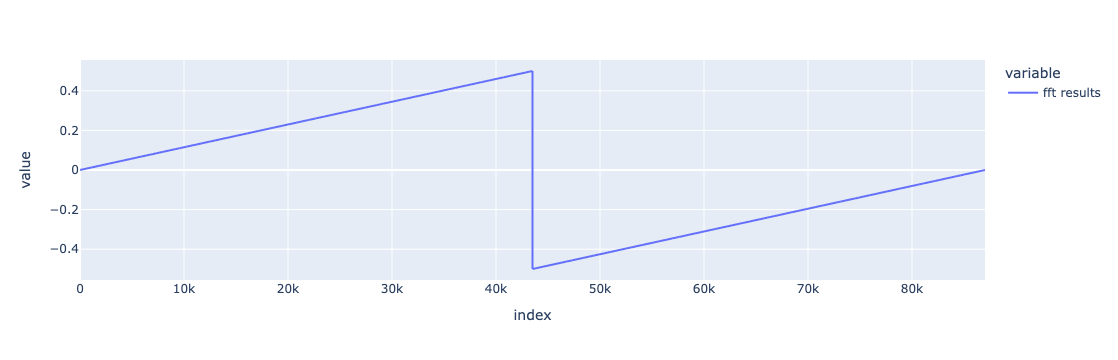

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -32.03977619403804,
  'P-value': 0.0,
  'Lags': np.int64(64),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -32.040
  P-value                         0.000
  Lags                               64
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-53.58495819716831),
  'P-value': 0.0,
  'Lags': 66,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -53.585
  P-value                         0.000
  Lags                               66
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -17.696643022531394,
  'P-value': 0.0,
  'Lags': np.int64(64),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -17.697
  P-value                         0.000
  Lags                               64
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}